<a href="https://colab.research.google.com/github/wenxuan0923/My-notes/blob/master/DL_text_preprocss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text data preprocessing: One-hot encoding & Word Embedding

Just like computer vision is pattern recognition applied to pixels, DL for natural-language processing is a pattern recognition applied to words, sentences and paragraphs. Similarly, we need to preprocess the input raw text data by converting it into a format the model will be able to understand (a numerical tensor). This process is called **vectorization**. There are multiple way to do this:

1. Segment text into **words**, and transform each word into a vector
2. Segment text into **characters**, and transform each character into a vector
3. Extract **n-grams of words or characters** and transform each n-gram into a vector

The different units into which you can break down text (words, characters,
or n-grams) are called **tokens**, and breaking text into such tokens is called **tokenization**. There are two major ways to associate a vector with a token: 

### **1. One-hot encoding**

One-hot encoding is the most common, basic way to turn a token into a vector.

In [0]:
import numpy as np
samples = ['Thalia wants lasagna for dinner!', 
           'Hung wants instant noodle for lunch.']

In [0]:
from keras.preprocessing.text import Tokenizer, one_hot

**Segment text into words:**

In [51]:
# The tokenizer will only take into account the 100 most common words
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(samples)

# Build the word index: associate a unique integer index with every word
print('Word index: ', tokenizer.word_index)

# Turn sentence into list of integers
sequences = tokenizer.texts_to_sequences(samples)
print('Sentences: ', sequences)

Word index:  {'wants': 1, 'for': 2, 'thalia': 3, 'lasagna': 4, 'dinner': 5, 'hung': 6, 'instant': 7, 'noodle': 8, 'lunch': 9}
Sentences:  [[3, 1, 4, 2, 5], [6, 1, 7, 8, 2, 9]]


In [52]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print('Shape of one_hot_result: ', one_hot_results.shape)
print(one_hot_results)

Shape of one_hot_result:  (2, 100)
[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


**Segment text into characters:**

In the Tokenizer function: if **char_level** is True, every character will be treated as a token.

In [54]:
# The tokenizer will only take into account the 26 most common characters
tokenizer = Tokenizer(num_words=26, char_level=True)
tokenizer.fit_on_texts(samples)
# Build the word index: associate a unique integer index with every character
print('Character index: ', tokenizer.word_index)
# Turn sentence into list of integers
sequences = tokenizer.texts_to_sequences(samples)
print('Sentences: ', sequences)

Character index:  {'n': 1, ' ': 2, 'a': 3, 't': 4, 'l': 5, 's': 6, 'o': 7, 'h': 8, 'i': 9, 'r': 10, 'w': 11, 'g': 12, 'f': 13, 'd': 14, 'e': 15, 'u': 16, '!': 17, 'c': 18, '.': 19}
Sentences:  [[4, 8, 3, 5, 9, 3, 2, 11, 3, 1, 4, 6, 2, 5, 3, 6, 3, 12, 1, 3, 2, 13, 7, 10, 2, 14, 9, 1, 1, 15, 10, 17], [8, 16, 1, 12, 2, 11, 3, 1, 4, 6, 2, 9, 1, 6, 4, 3, 1, 4, 2, 1, 7, 7, 14, 5, 15, 2, 13, 7, 10, 2, 5, 16, 1, 18, 8, 19]]


In [55]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print('Shape of one_hot_result: ', one_hot_results.shape)
print(one_hot_results)

Shape of one_hot_result:  (2, 26)
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0.
  0. 0.]]


### **2. Token embedding** (word embedding)

With one-hot representation, the obtained word vectors are
sparse, high-dimensional, and hardcoded. For example:


$$\text{Man}=\begin{bmatrix}
   0 \\ 0 \\ 0 \\ 0 \\ \vdots \\ 1 \\ \vdots\\ 0 \\ 0
\end{bmatrix}, 
\text{Woman}=\begin{bmatrix}
     0 \\ 0 \\ 0 \\ 0 \\ 0 \\ \vdots \\ 1 \\ \vdots \\ 0
\end{bmatrix},
\text{King}=\begin{bmatrix}
     0 \\ 0 \\ 0 \\ \vdots \\ 1 \\ \vdots\\ 0 \\ 0 \\ 0
\end{bmatrix},
\text{Queen}=\begin{bmatrix}
     0 \\ 0 \\ 0 \\ 0 \\ 0 \\ \vdots \\ 1 \\ \vdots\\ 0 
\end{bmatrix},
\text{Apple}=\begin{bmatrix}
     0 \\ \vdots \\ 1  \\ \vdots \\ 0 \\ 0 \\ 0\\ 0 \\ 0
\end{bmatrix},
\text{Orange}=\begin{bmatrix}
     0 \\ 0 \\ 0 \\ 0 \\ 0 \\ \vdots \\ 1 \\ \vdots \\ 0
\end{bmatrix}
$$

A weakness of this representation is that it treats each word as an isolated thing. For example, in the vectors listed above, the relationship between apple and orange is not any closer as the relationship between any of the other words man, woman, king, queen, and orange. And so, it's not easy for the learning algorithm to generalize from knowing that `orange juice` is a popular thing, to recognizing that `apple juice` might also be a popular thing or a popular phrase.


Word Embedding make it possible for us to learn a **featurized representation** with each of these words in the dictionary. For example, each of these words, we want to know what is the gender associated with each of these things. So, if gender goes from -1 for male to +1 for female, then the gender associated with man might be -1, for woman might be +1. 

|  |Man|Woman|King|Queen|Apple|Orange|
|:------|:---:|:---:|:---:|:---:|:---:|:---:|
|Gender|-1|1|-0.95|0.97|0|0.01|
|Rpyal|0.01|0.02|0.93|0.95|-0.01|0.00|
|Age|0.03|0.02|0.7|0.69|0.03|-0.02|
|Food|0.04|0.01|0.02|0.01|0.95|0.97|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|

Imagine we have 64 these kind of features, then each word can be represented as a 64 dimensional vector. With this new representaion, the pairs `(Man, Woman)`, `(King, Queen)` and `(Apple, Orange)` will be quite similar, so the model will be able to generalize better even with a relatively small dataset. Most importantly, we get a low-dimensional dense vector. So word embeddings pack more information into far fewer dimensions.

To get a bit more abstract, the **geometric relationship** (like L2 norm) between word vectors should reflect the **semantic relationships** between these words. Word embeddings are meant to map human language into a geometric space such that the geometric distance between any two vectors relates to the semantic distance between them.

#### There are two ways to learn word embedding:

1. Use pretrained word embedding trained using a different machine learning task.

2. Learn word vectors in the same way you learn the weights of a neural network with **Embedding Layer** from Keras.
> The perfect word-embedding space for a certain task may not be ideal for another NLP task. It is thus reasonable to learn a new embedding space with every new task. 


In [0]:
from keras import layers, models
emdding_layer = layers.Embedding(1000, 64) 
# Dimensionality of the embeddings is 64
# 1000 means the number of possible tokens(words)

The Embedding layer is best understood as a dictionary that map **integer indices** (which stand for specific words) to **dense vectors**. The Embedding layer takes as input a **2D tensor of integers**, of shape (samples,
sequence_length), where each entry is a sequence of integers (a sentence). Note the length of each sentence is not always the same, we need to use **padding** method, such that: 
> Sequences that are shorter than others should be padded with zeros, and sequences that are longer should be truncated.

This layer outputs a **3D floating-point tensor**
 of shape (samples, sequence_
length, embedding_dimensionality). Such a 3D tensor can then be processed by
an RNN layer or a 1D convolution layer.

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_words = 10000   
# Max number of words to include (10000). 
# Words are ranked by how often they occur (in the training set) 
# Only the most frequent words are kept
maxlen = 40 
# Maximum length of all sequences.
# Cuts off the text after this number of words
# This means you are only looking at the first 40 words in every review
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [82]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [83]:
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [85]:
print(x_train.shape)
print(x_test.shape)

(25000, 40)
(25000, 40)


In [89]:
model = models.Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(layers.Flatten())  # Flatten the 3D tensor into 2D
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 40, 8)             80000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 320)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 320)               1280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 321       
Total params: 81,601
Trainable params: 80,961
Non-trainable params: 640
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 82us/step - loss: 0.7048 - acc: 0.5822 - val_loss: 0.5476 - val_acc: 0.7458
Epoch 2/10
20000/20000 [==============================] - 1s 74us/step - loss: 0.4879 - acc: 0.7646 - val_loss: 0.4593 - val_acc: 0.7756
Epoch 3/10
20000/20000 [==============================] - 1s 74us/step - loss: 0.4309 - acc: 0.7990 - val_loss: 0.4468 - val_acc: 0.7816
Epoch 4/10
20000/20000 [==============================] - 2s 78us/step - loss: 0.3952 - acc: 0.8201 - val_loss: 0.4467 - val_acc: 0.7902
Epoch 5/10
20000/20000 [==============================] - 1s 74us/step - loss: 0.3824 - acc: 0.8266 - val_loss: 0.4455 - val_acc: 0.7882
Epoch 6/10
20000/20000 [==============================] - 1s 74us/step - loss: 0.3605 - acc: 0.8403 - val_loss: 0.4481 - val_acc: 0.7908
Epoch 7/10
20000/20000 [==============================] - 2s 81us/step - loss: 0.3435 - acc: 0.8480 - val_loss: 0.4549 - val_acc:

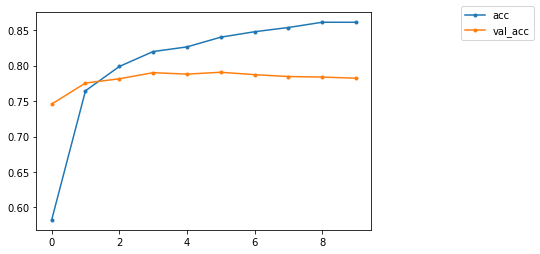

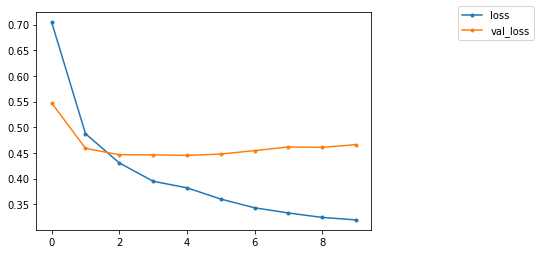

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
ax1 = pd.DataFrame(history.history)[['acc', 'val_acc']].plot(marker='.')
ax1.legend(bbox_to_anchor=(1.5, 1.05))
ax2 = pd.DataFrame(history.history)[['loss', 'val_loss']].plot(marker='.')
ax2.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()